In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
SHAPE_PATH = "dataset/shapefiles/025-imperial.shp"
# SHAPE_PATH = "dataset/shapefiles/003-alpine.shp"

VOTES_PATH = "dataset/final-results/025-imperial.csv"

shapes_gdf = gpd.read_file(SHAPE_PATH)
votes_df = pd.read_csv(VOTES_PATH)

In [21]:
shapes_gdf = shapes_gdf.set_index('pct16').drop('area', axis=1)
votes_df = votes_df.set_index('pct16')[['pres_clinton', 'pres_trump']]
gdf = shapes_gdf.join(votes_df)
gdf = gdf.rename(columns={'pres_clinton': 'abs_clinton', 'pres_trump': 'abs_trump'})

In [22]:
gdf['per_clinton'] = gdf['abs_clinton'] / (gdf['abs_clinton'] + gdf['abs_trump'])
gdf['per_trump'] = gdf['abs_trump'] / (gdf['abs_clinton'] + gdf['abs_trump'])

In [23]:
gdf.head()

,geometry,abs_clinton,abs_trump,per_clinton,per_trump
pct16,,,,,
025-281045,"POLYGON ((-115.65670 32.69474, -115.65216 32.6...",13.0,0.0,1.000000,0.000000
025-245228,"POLYGON ((-115.56954 32.77721, -115.57100 32.7...",314.0,184.0,0.630522,0.369478
025-245226,"POLYGON ((-115.56105 32.77390, -115.56100 32.7...",623.0,377.0,0.623000,0.377000
025-245225,"POLYGON ((-115.55464 32.77838, -115.55681 32.7...",119.0,56.0,0.680000,0.320000
025-245224,"MULTIPOLYGON (((-115.54322 32.77380, -115.5494...",717.0,193.0,0.787912,0.212088


<AxesSubplot:>

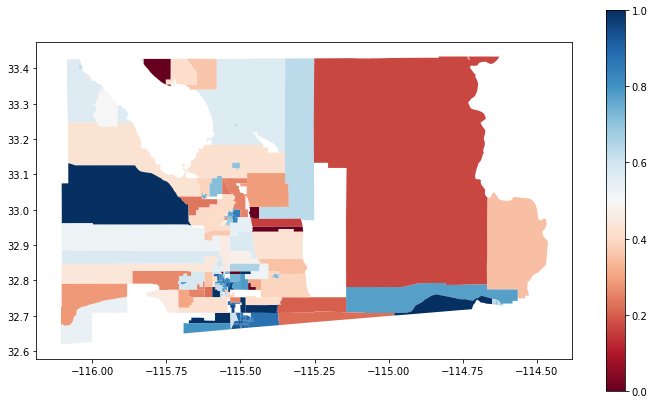

In [24]:
gdf.plot("per_clinton", legend=True, cmap='RdBu', figsize=(12,7))